In [41]:
dataset = read.csv('creditcard.csv')


In [42]:
head(dataset, 4)


Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.01830678,0.277837576,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.22577525,-0.638671953,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.24799815,0.771679402,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.10830045,0.005273597,-0.1903205,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0


In [43]:
# We do not need 'Time' column
dataset$Time <- NULL


In [44]:
sprintf("Number of Rows: %d    Number of Columns: %d",nrow(dataset), length(names(dataset)))


[1] "Number of Rows: 284807    Number of Columns: 30"

In [74]:
str(dataset)

'data.frame':	284807 obs. of  30 variables:
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V18   : num  0.0258 -0.1834 -0.1214 1.965

In [75]:
summary(dataset)

       V1                  V2                  V3                 V4          
 Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256   Min.   :-5.68317  
 1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904   1st Qu.:-0.84864  
 Median :  0.01811   Median :  0.06549   Median :  0.1799   Median :-0.01985  
 Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000   Mean   : 0.00000  
 3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272   3rd Qu.: 0.74334  
 Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826   Max.   :16.87534  
       V5                   V6                 V7                 V8           
 Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572   Min.   :-73.21672  
 1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541   1st Qu.: -0.20863  
 Median :  -0.05434   Median : -0.2742   Median :  0.0401   Median :  0.02236  
 Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000   Mean   :  0.00000  
 3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [76]:
# Define a function that outputs a quick data quality report.

data_report <- function(df) {
  
  #DataFrame with column names and their data types
  data_types <- data.frame('data_type'= sapply(df, class))

  #DataFrame with Count
  data_count <- data.frame('count' = colSums(!is.na(df)))

  #DataFrame with unique values
  unique_value_counts <- data.frame('unique_values'= sapply(df, function(x) length(unique(x))))
 
  #Dataframe with number of missing values for each column
  missing_data_counts <- data.frame('missing_values'= sapply(df, function(x) sum(length(which(is.na(x))))))
  
  #Combine all dataframes
  data_quality_report <- cbind(data_types, data_count, unique_value_counts, missing_data_counts )
  print('Data Quality Report')

  return(data_quality_report)
}
                                                             

In [77]:
data_report(dataset)


[1] "Data Quality Report"


,data_type,count,unique_values,missing_values
V1,numeric,284807,275663,0
V2,numeric,284807,275663,0
V3,numeric,284807,275663,0
V4,numeric,284807,275663,0
V5,numeric,284807,275663,0
V6,numeric,284807,275663,0
V7,numeric,284807,275663,0
V8,numeric,284807,275663,0
V9,numeric,284807,275663,0
V10,numeric,284807,275663,0


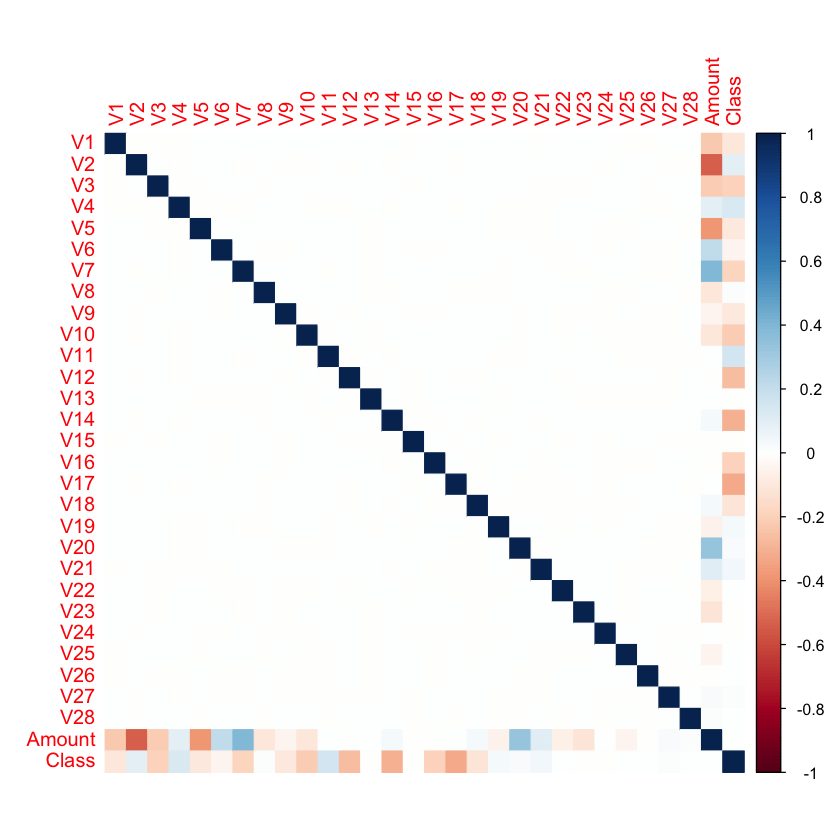

In [78]:
# install.packages('corrplot')
library(corrplot)
correlations <- cor(dataset)
corrplot(correlations, method="color")


In [79]:
# Chack number of fraud and non-fraud transactions
table(dataset$Class)



     0      1 
284315    492 

### Most machine learning algorithms are sensitive to unbalance in the predictor classes. A machine learning model that has been trained and tested on such a dataset could now predict “non_fraud” for all samples and still gain a very high accuracy. An unbalanced dataset will bias the prediction model towards the more common class!



In [80]:
# Check the percentage of two classes
prop.table(table(dataset$Class))*100




         0          1 
99.8272514  0.1727486 

### As you can see, the dataset contains less than 1% of positive cases and more than 99% of negative cases. This is a prime example of a severely imbalanced dataset. So, how badly can this affect our prediction accuracy ? Let’s build a model on this dataset. I’ll be using decision tree algorithm for modeling purpose.

In [45]:
# Scale 'Amount' column
dataset$Amount <- scale(dataset$Amount)
head(dataset, 4)



V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,⋯,-0.01830678,0.277837576,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.2449638,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,⋯,-0.22577525,-0.638671953,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.3424739,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,⋯,0.24799815,0.771679402,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.1606839,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,⋯,-0.10830045,0.005273597,-0.1903205,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.1405340,0


In [56]:
# Convert 'Class' column from integer to factor type
dataset$Class <- factor(dataset$Class, labels = c('FALSE', 'TRUE'))
head(dataset$Class)


[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [57]:
# Train, Test Split
n_rows <- nrow(dataset)
set.seed(101)
idx_data <- sample(1:n_rows, 0.8 * n_rows)


train_data = dataset[idx_data,]
test_data = dataset[-idx_data,]


In [58]:
sprintf("Training set: Number of Rows: %d,    Number of Columns: %d",nrow(train_data), length(names(train_data)))
sprintf("Test set: Number of Rows: %d,    Number of Columns: %d",nrow(test_data), length(names(test_data)))




[1] "Training set: Number of Rows: 227845,    Number of Columns: 30"

[1] "Test set: Number of Rows: 56962,    Number of Columns: 30"

In [59]:
# Check the percentage of two classes in training set
prop.table(table(train_data$Class))*100




     FALSE       TRUE 
99.8323422  0.1676578 

In [60]:
# Check the percentage of two classes in test set
prop.table(table(test_data$Class))*100




     FALSE       TRUE 
99.8068888  0.1931112 

# Modeling the original unbalanced dataset

### Logistic Regression

In [61]:
# Logistics Regression
glm_imbalanced <- glm(Class ~ ., data = train_data, family = binomial(link="logit"))


In [63]:
train_data$pred <- predict(glm_imbalanced, newdata=train_data, type="response")
test_data$pred <- predict(glm_imbalanced, newdata=test_data, type="response")


### In order to use the logistic regression as a classifier, you must pick a threshold; scores above the threshold will be classified as positive, those below as negative. When you pick a threshold, you’re trying to balance the precision of the classifier (what fraction of the predicted positives are true positives) and its recall (how many of the true positives the classifier finds).

In [64]:
ctab.test <- table(pred=test_data$pred>0.02, Class=test_data$Class)
ctab.test


       Class
pred    FALSE  TRUE
  FALSE 56789     9
  TRUE     63   101

$$\large Precision = \frac{True Positive}{True Positive + False Positive} $$

In [65]:
precision <- ctab.test[2,2]/sum(ctab.test[2,])
precision


[1] 0.6158537

$$\large Recall = \frac{True Positive}{True Positive + False Negative} $$

In [66]:
recall <- ctab.test[2,2]/sum(ctab.test[,2])
recall


[1] 0.9181818

$$\large Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative} $$

In [74]:
accuracy <- (ctab.test[1,1] + ctab.test[2,2]) / (sum(ctab.test[,1])+sum(ctab.test[,2]))
accuracy


[1] 0.998736

In [99]:
# Another way of calculating the accuracy
mean((test_data$pred>0.02) == test_data$Class)


[1] 0.998736

In [155]:
# Calculate precision, recall, F1 scores with the help of 'caret' library
library(caret)

precision<- posPredValue(factor(test_data$pred > 0.02), test_data$Class, positive="TRUE")
sprintf('precision: %f', precision) 
recall<- sensitivity(factor(test_data$pred > 0.02), test_data$Class, positive="TRUE")
sprintf('recall: %f', recall)
F1<- (2 * precision * recall) / (precision + recall)
sprintf('F1: %f', F1)


[1] "precision: 0.615854"

[1] "recall: 0.918182"

[1] "F1: 0.737226"

In [217]:
library(caret)

threshold_list <- c(0.001, 0.01, 0.02, 0.04, 0.08, 0.1, 0.3, 0.5, 0.8, 0.999)
precision_list <- list()
recall_list <- list()
F1_list <- list()
accuracy_list <- list()
i <- 1

for (threshold in threshold_list){
    
    precision_list[i] <- posPredValue(factor(test_data$pred > threshold), test_data$Class, positive="TRUE")
    
    recall_list[i] <- sensitivity(factor(test_data$pred > threshold), test_data$Class, positive="TRUE")

    F1_list[i] <- (2 * precision_list[[i]] * recall_list[[i]]) / (precision_list[[i]] + recall_list[[i]])
     
    accuracy_list[i] <- mean((test_data$pred > threshold ) == test_data$Class)
    
    i <- i + 1
  
}
                                                            

In [218]:

unbalanced_metrics <- do.call(rbind, Map(data.frame, threshold=threshold_list, 
                              precision = precision_list,
                              recall = recall_list,
                              F1 = F1_list,
                             Accuracy = accuracy_list))


In [219]:
unbalanced_metrics

threshold,precision,recall,F1,Accuracy
0.001,0.02148997,0.9545455,0.04203363,0.9159791
0.010,0.44588745,0.9363636,0.60410557,0.9976300
0.020,0.61585366,0.9181818,0.73722628,0.9987360
0.040,0.74436090,0.9000000,0.81481481,0.9992100
0.080,0.80000000,0.8727273,0.83478261,0.9993329
0.100,0.79487179,0.8454545,0.81938326,0.9992802
0.300,0.81730769,0.7727273,0.79439252,0.9992276
0.500,0.84090909,0.6727273,0.74747475,0.9991222
0.800,0.84057971,0.5272727,0.64804469,0.9988940
0.999,0.80645161,0.2272727,0.35460993,0.9984024


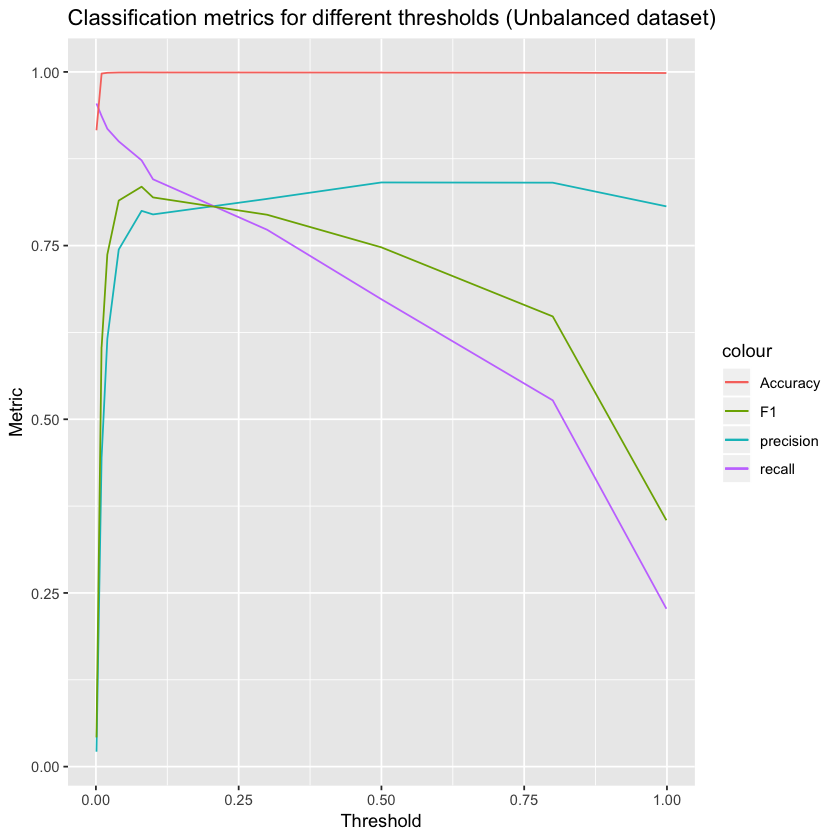

In [220]:
library(ggplot2)

ggplot(unbalanced_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Unbalanced dataset)",
       x="Threshold", y = "Metric") 
  

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


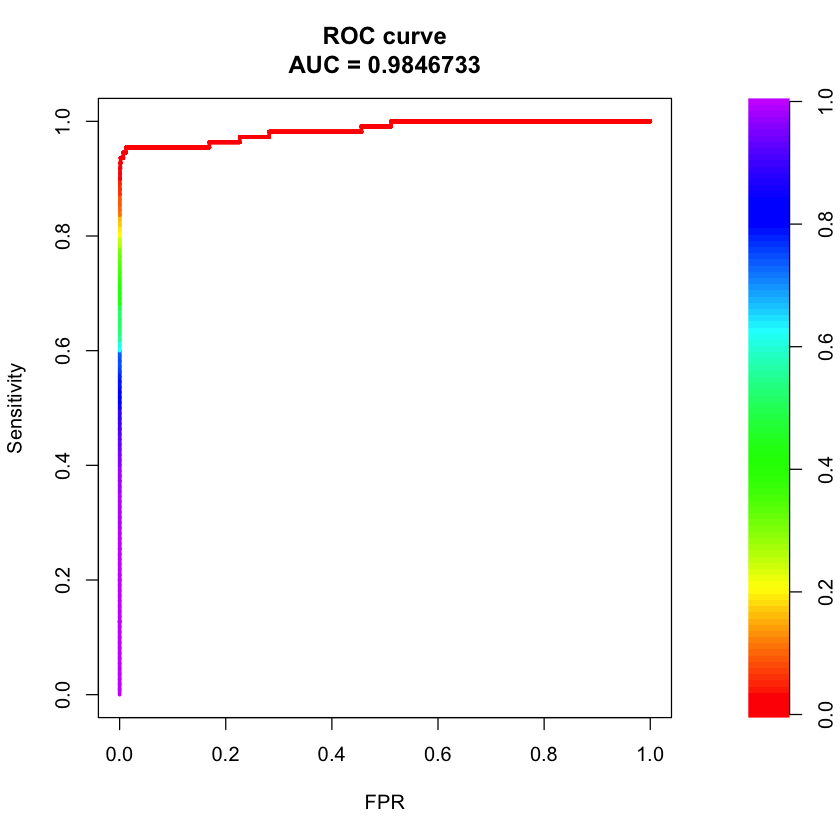

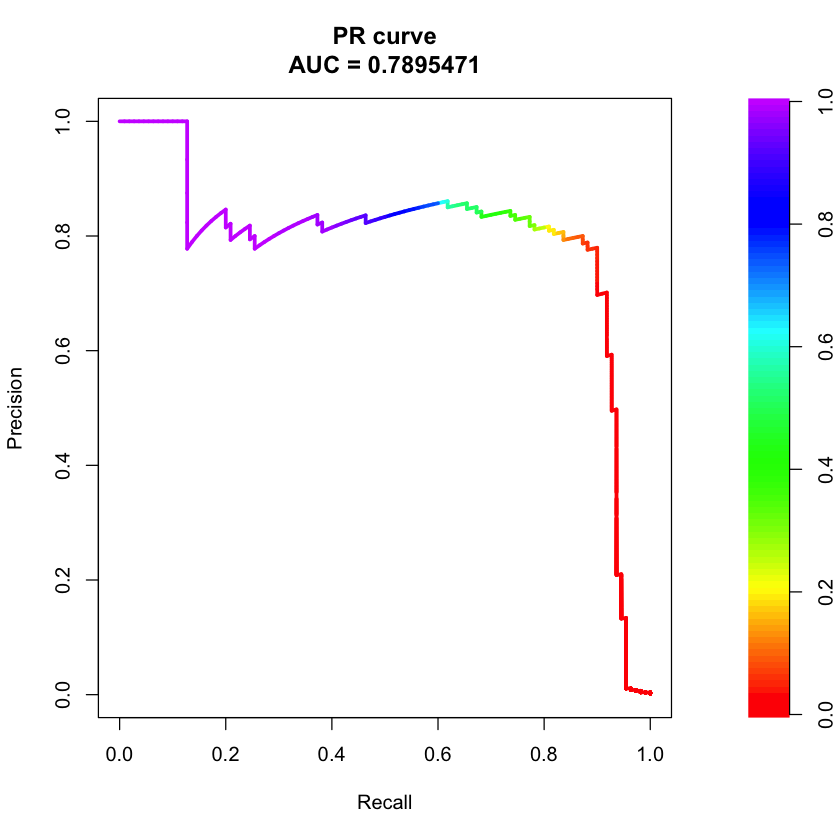

In [75]:
# Creat ROC curve and precision-recall plot with the help of 'PRROC' package
# install.packages("PRROC")
library(PRROC)

fg <- test_data$pred[test_data$Class == TRUE]
bg <- test_data$pred[test_data$Class == FALSE]

# ROC Curve    
roc <- roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(roc)

# PR Curve
pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
plot(pr)

# How to balance data for modeling


## Under-sampling

### With under-sampling, we randomly select a subset of samples from the class with more instances to match the number of samples coming from each class. In this scenario, our new dataset will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. In our example, we would randomly pick 492 out of the 284315 fraud cases. The main disadvantage of under-sampling is that we loose potentially relevant information from the left-out samples.

In [196]:
# Number of fraud observations
nrows_fraud <- nrow(subset(dataset, dataset$Class == 'TRUE'))
# Fraud data
fraud_data <- subset(dataset, dataset$Class == 'TRUE')
# Number of non-fraud observations
nrows_nonfraud <- nrow(subset(dataset, dataset$Class == 'FALSE'))
# Non-Fraud data
nonfraud_data <- subset(dataset, dataset$Class == 'FALSE')
# Randomly select 'nrows_fraud' observations from 'nrows_nonfraud' data points
set.seed(101)
idx_nonfraud <- sample(1:nrows_nonfraud, nrows_fraud)

sample_nonfraud_data <- nonfraud_data[idx_nonfraud,]
balanced_dataset <- rbind(fraud_data, sample_nonfraud_data)

In [198]:
# Chack number of fraud and non-fraud transactions
table(balanced_dataset$Class)




FALSE  TRUE 
  492   492 

In [197]:
# Check the percentage of two classes
prop.table(table(balanced_dataset$Class))*100




FALSE  TRUE 
   50    50 

In [199]:
# Train, Test Split
n_rows <- nrow(balanced_dataset)
set.seed(101)
idx_data <- sample(1:n_rows, 0.8 * n_rows)


balanced_train_data = balanced_dataset[idx_data,]
balanced_test_data = balanced_dataset[-idx_data,]


In [200]:
prop.table(table(balanced_train_data$Class))*100




   FALSE     TRUE 
50.69886 49.30114 

In [201]:
prop.table(table(balanced_test_data$Class))*100




   FALSE     TRUE 
47.20812 52.79188 

### Logistic Regression with Under-sampling

In [205]:
# Logistics Regression
glm_balanced <- glm(Class ~ ., data = balanced_train_data, family = binomial(link="logit"))



Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [206]:
balanced_train_data$pred <- predict(glm_balanced, newdata=balanced_train_data, type="response")
balanced_test_data$pred <- predict(glm_balanced, newdata=balanced_test_data, type="response")



In [221]:
library(caret)

threshold_list <- c(0.001, 0.01, 0.02, 0.04, 0.08, 0.1, 0.3, 0.5, 0.8, 0.999)
precision_list <- list()
recall_list <- list()
F1_list <- list()
accuracy_list <- list()
i <- 1

for (threshold in threshold_list){
    
    precision_list[i] <- posPredValue(factor(balanced_test_data$pred > threshold), balanced_test_data$Class, positive="TRUE")
    
    recall_list[i] <- sensitivity(factor(balanced_test_data$pred > threshold), balanced_test_data$Class, positive="TRUE")

    F1_list[i] <- (2 * precision_list[[i]] * recall_list[[i]]) / (precision_list[[i]] + recall_list[[i]])
     
    accuracy_list[i] <- mean((test_data$pred > threshold ) == test_data$Class)
    
    i <- i + 1
  
}
                                                            

In [222]:

balanced_metrics <- do.call(rbind, Map(data.frame, threshold=threshold_list, 
                              precision = precision_list,
                              recall = recall_list,
                              F1 = F1_list,
                             Accuracy = accuracy_list))



In [223]:
balanced_metrics

threshold,precision,recall,F1,Accuracy
0.001,0.6459627,1.0000000,0.7849057,0.9159791
0.010,0.7285714,0.9807692,0.8360656,0.9976300
0.020,0.7769231,0.9711538,0.8632479,0.9987360
0.040,0.8461538,0.9519231,0.8959276,0.9992100
0.080,0.9158879,0.9423077,0.9289100,0.9993329
0.100,0.9142857,0.9230769,0.9186603,0.9992802
0.300,0.9892473,0.8846154,0.9340102,0.9992276
0.500,1.0000000,0.8846154,0.9387755,0.9991222
0.800,1.0000000,0.8750000,0.9333333,0.9988940
0.999,1.0000000,0.8173077,0.8994709,0.9984024


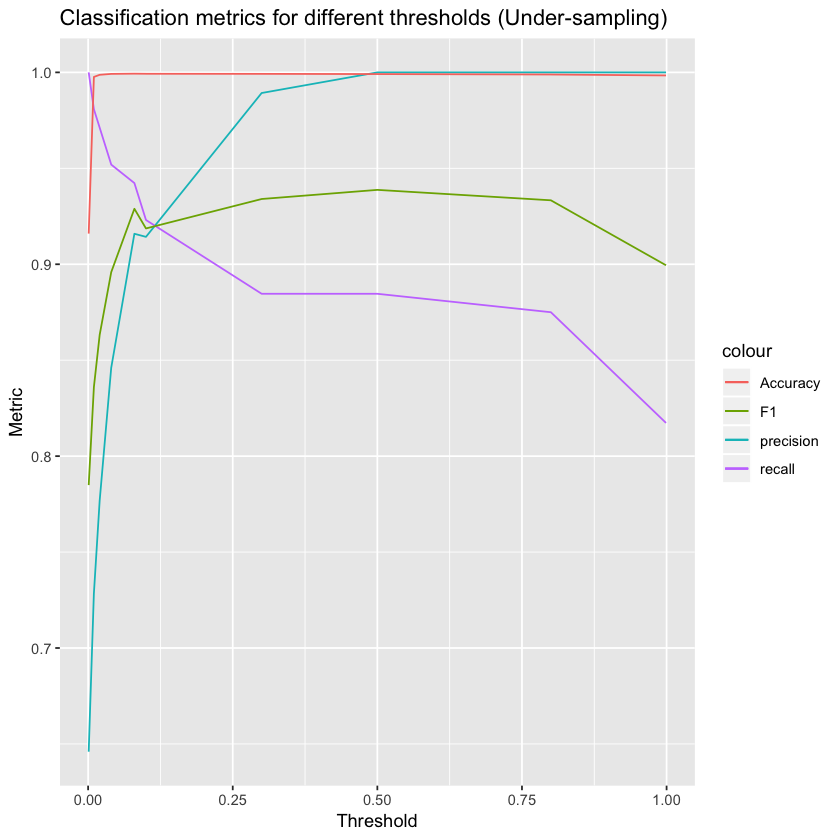

In [224]:
library(ggplot2)

ggplot(balanced_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Under-sampling)",
       x="Threshold", y = "Metric") 
  

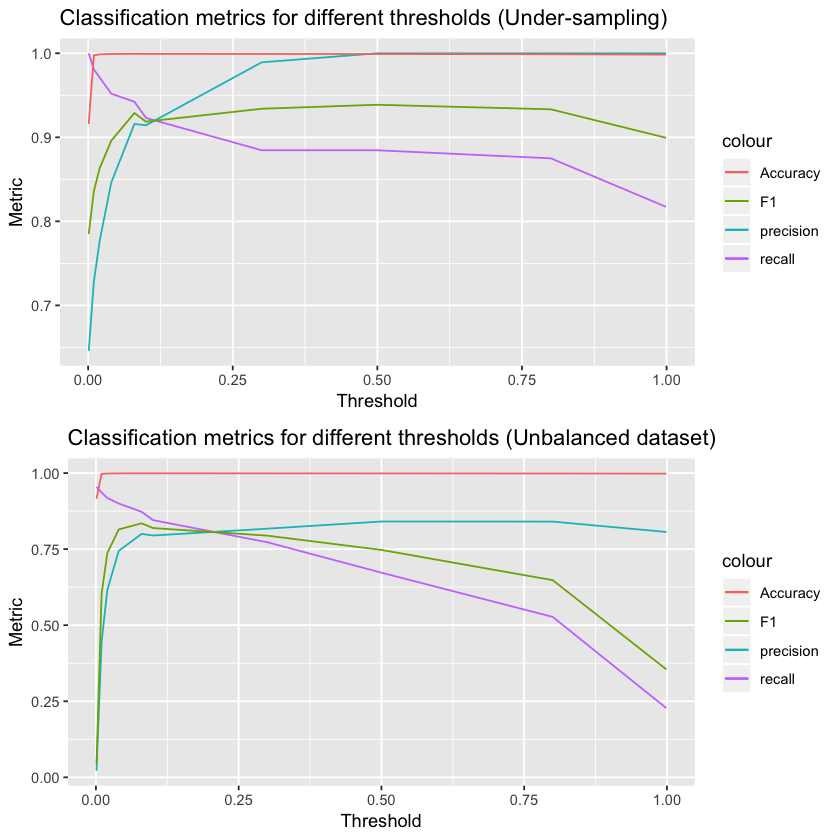

In [232]:
#install.packages('ggbubr')
library(ggpubr)

gg1 <- ggplot(balanced_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Under-sampling)",
       x="Threshold", y = "Metric") 
gg2 <- ggplot(unbalanced_metrics, aes(threshold)) + 
  geom_line(aes(y = precision, colour = "precision")) +
  geom_line(aes(y = recall, colour = "recall")) +
  geom_line(aes(y = F1, colour = "F1")) +
  geom_line(aes(y = Accuracy, colour = "Accuracy")) +
  labs(title="Classification metrics for different thresholds (Unbalanced dataset)",
       x="Threshold", y = "Metric") 

ggarrange(gg1, gg2, ncol = 1, nrow = 2)

## Oversampling

### With oversampling, we randomly duplicate samples from the class with fewer instances or we generate additional instances based on the data that we have, so as to match the number of samples in each class. While we avoid loosing information with this approach, we also run the risk of overfitting our model as we are more likely to get the same samples in the training and in the test data, i.e. the test data is no longer independent from training data. This would lead to an overestimation of our model’s performance and generalizability.